## EDA  - House Price Prediction

### 1. Know your Data-

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the data
df_train=pd.read_csv("train.csv")

In [3]:
#data type of each column.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#Count of the columns with respective to the data types.
df_train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

#### Summary - 
- We have total 1460 observations & 81 features.
- Out of which 43 are categorical, 35 are integers and 3 are float value variables.

In [5]:
#How the data looks like-
df_train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1338,1339,60,RL,95.0,13450,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,200000
151,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,New,Partial,372402
492,493,60,RL,105.0,15578,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,New,Partial,172785
1302,1303,60,RL,92.0,10120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,290000
52,53,90,RM,110.0,8472,Grvl,NaN,IR2,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,110000
1236,1237,160,RL,36.0,2628,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,175500
613,614,20,RL,70.0,8402,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,New,Partial,147000
593,594,120,RM,NaN,4435,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,140000
38,39,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
1347,1348,20,RL,93.0,15306,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,5,2007,New,Partial,283463


In [6]:
#Checking for the duplicate values.
df_train.duplicated().sum()

0

## 2. Analysis of the Target Column - 

In [7]:
#Correlation of the dependent variable with independent variables.  
df_corr=df_train.corr()['SalePrice']

In [8]:
df_corr=pd.DataFrame(df_corr)
df_corr=df_corr.sort_values(by='SalePrice',ascending=False)
df_corr

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [9]:
#Analysing the dependent variable.
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Summary - 
- The minimum value is not zero.
- The maximum price of the house is 755000
- The average price of the houses in this dataset is 180921

C:\Users\Snehal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

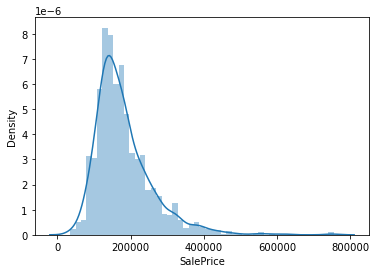

In [10]:
#plot distplot to analyse the target variable & its distribution.
sns.distplot(df_train['SalePrice'])

In [11]:
#skewness of the distributed data -
df_train['SalePrice'].skew()

1.8828757597682129

## 3. Bivariate Analysis of Target Column -
we will analyse the target column based on the correlation with each of the independent feature having correlation > 50%

1. 'OverallQual' vs 'Saleprice'
- OverallQual is a categorical feature

### Correlation matrix (HeatMap) - 

<AxesSubplot:>

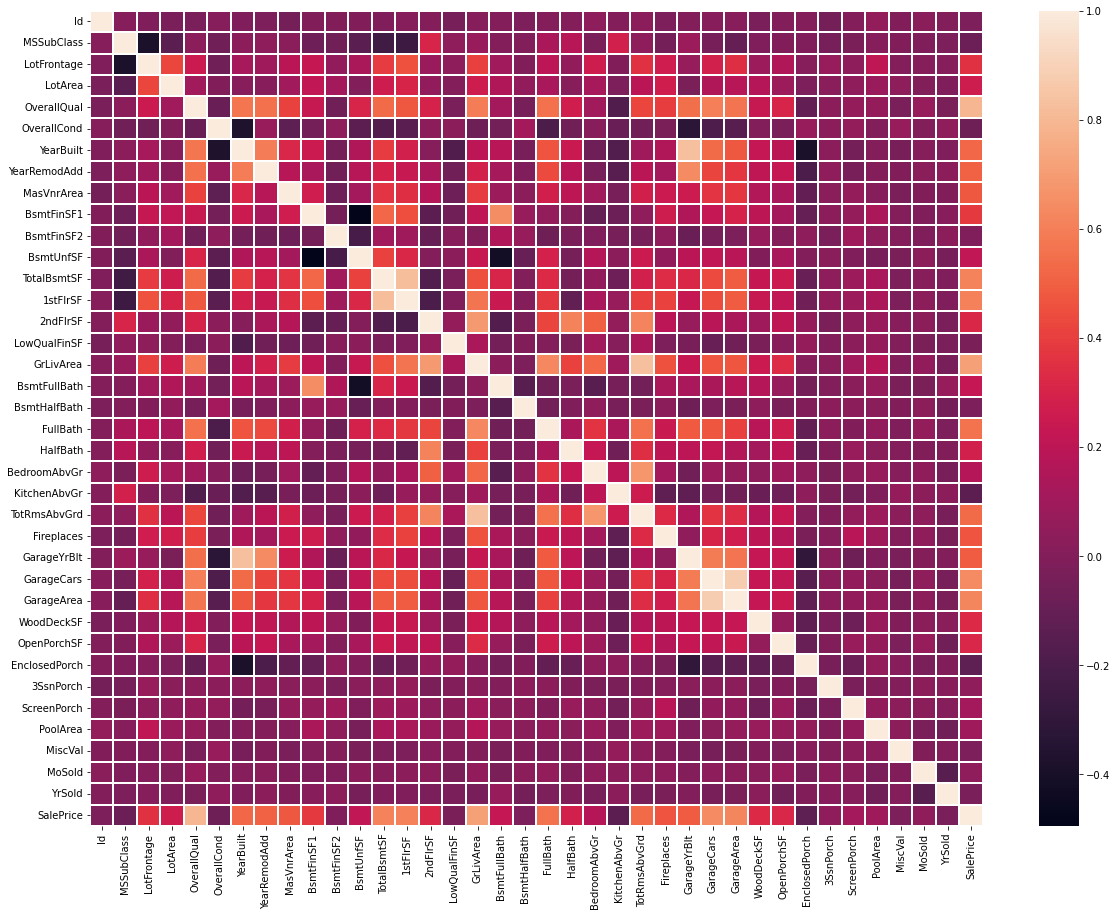

In [12]:
f, ax = plt.subplots(figsize=(20, 15)) #defining the size of the plot
sns.heatmap(df_train.corr(),linewidths=0.1)

In [13]:
df_corr=df_corr.sort_values(by='SalePrice',ascending=False)

In [14]:
#Fetching top 10 column names that are coreelated to target column. 
col=df_corr.iloc[:10].index
col

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [15]:
#Finding the correlation between the columns that are highly correlated with target column
cm=df_train[col].corr()
cm

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000


In [16]:
df_train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot:>

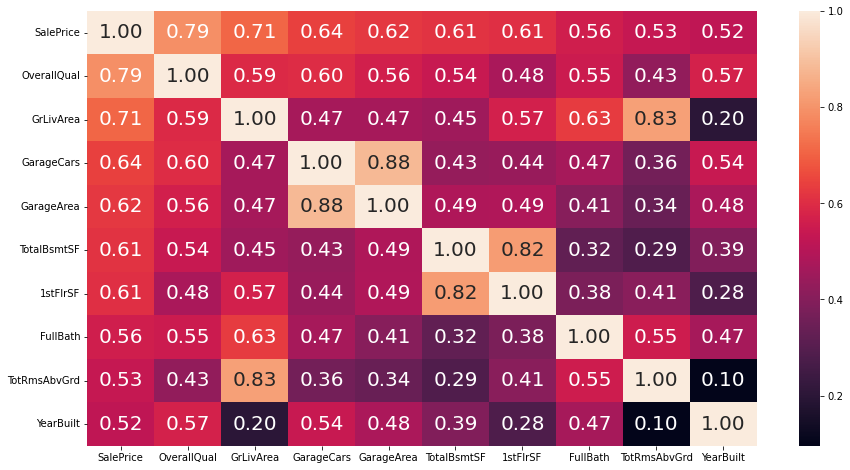

In [17]:
#Heatmap Analysis
plt.figure(figsize=(15,8))
sns.heatmap(cm,annot=True,fmt=".2f",annot_kws={'size':20})

### Summary - 
- 'GarageCars' and 'GarageArea' are highly correlated with each other that means milticolinearity present between these two features. We can only take one feature instead of one. we will take 'GarageCars' because its relation with the target column is more.
- We take 'TotalBsmtSF' between 'TotalBsmtSF' and '1stFlrSF'
- 'GrLivArea' and 'TotRmsAbvGrd' are also falls under multicolinearity. so we take 'GrLivArea'

#### Analysing the selected column using pairplot to further check the distribution of the data

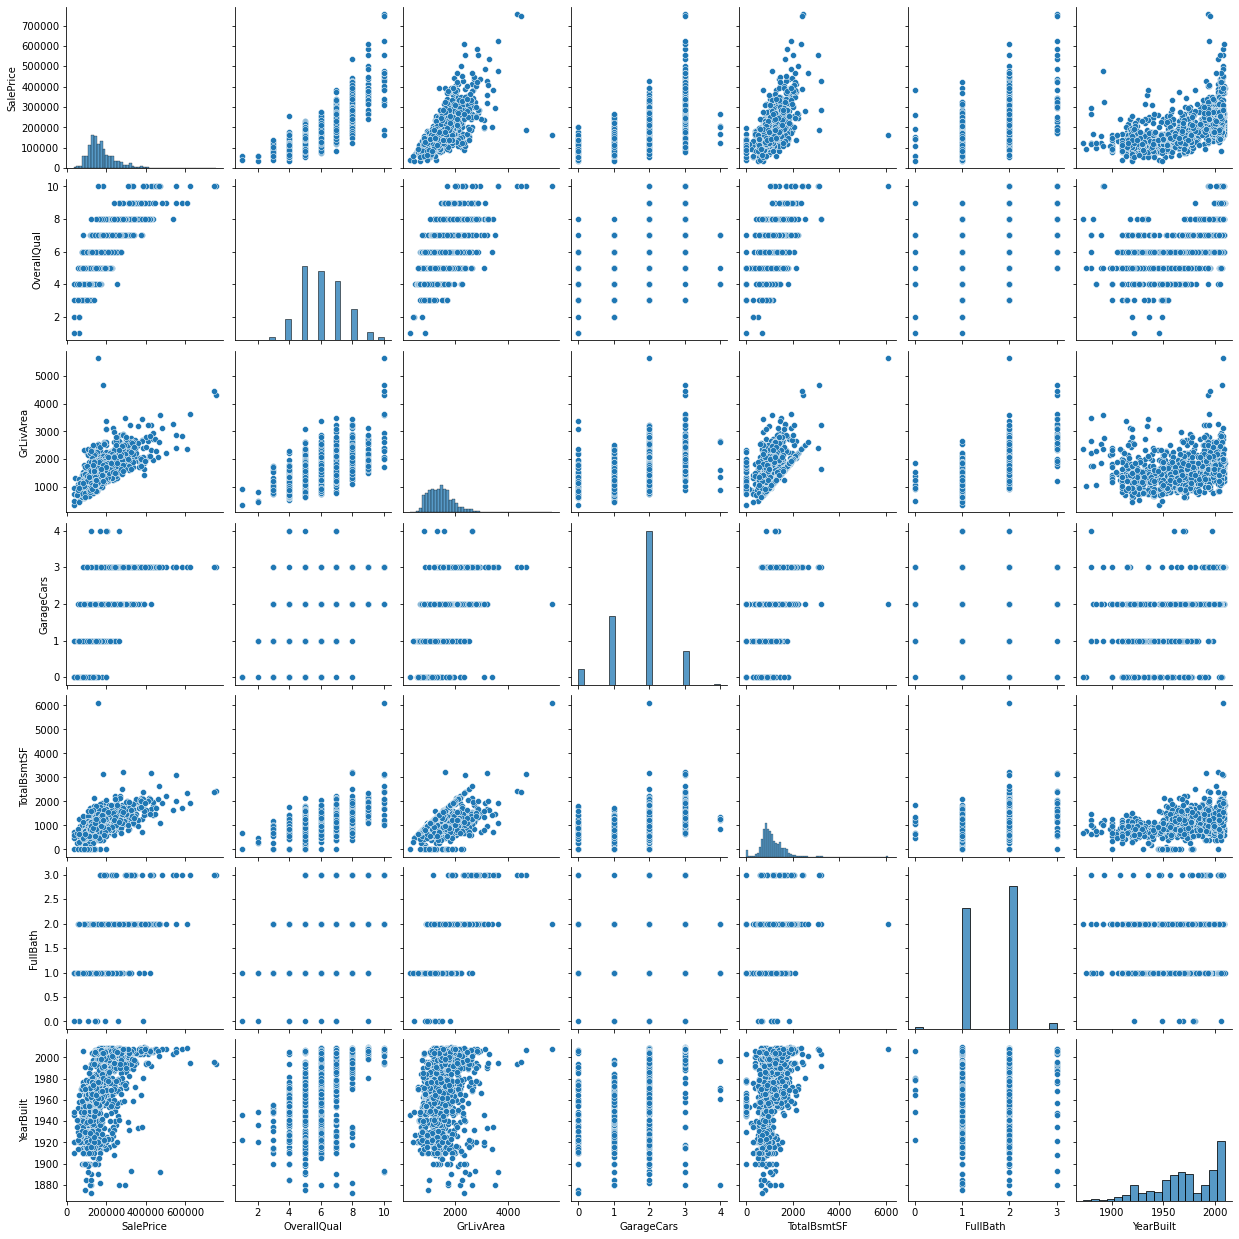

In [18]:
#paitplot on the selected columns
col_new=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df_train[col_new])

- This mega pairplot gives us reasonable idea about variables ralationship.
1. One of the figure we may find interesting is the one between 'GrLivArea' and 'TotalBsmtSF'. In this figure we can observe the dots draws a linear line which almost act as a border line.
2. We can also observe the relationship between 'SalePrice' and 'YearBuilt'. We can see there is instant rise at the last years.

## 4. Working on missing data - 

In [19]:
#sorting the columns having maximum number of missing values
total=df_train.isnull().sum().sort_values(ascending=False)
total

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [20]:
#calculating the percentage of the missing data by each column.
percent=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
percent

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64

In [21]:
#converting the total & percentage of missing data into dataframe to analyse
df_missing=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
df_missing.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


## Summary - 
- We can observe here the first 6 columns have the high missing data, so we have to drop these columns.
- GarageX as above has the same count of missing data, we have taken 'GarageCars' against all these variables. so we drop them too.
- Same logic applies on BsmtX.
- Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential.
- Column 'Electrical' has only one missing value so we drop that observation.

In [22]:
#Filter the variables which having the missing data more than 1
df_missing=df_missing[df_missing['Total']>1]
df_missing

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [23]:
#Drop the column having missing observations more than 1 
df_train=df_train.drop(df_missing.index,axis=1)

In [24]:
#Drop the missing obervation of 'Electrical' column.
df_train=df_train.dropna()

In [25]:
#Checking for the missing value
df_train.isnull().sum().max()

0

In [26]:
df_train.sample(5)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
672,673,20,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,165000
787,788,60,RL,10142,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,WD,Normal,233000
255,256,60,RL,8738,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2006,WD,Normal,230000
834,835,20,RL,7875,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,139950
30,31,70,C (all),8500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,172,0,0,0,0,7,2008,WD,Normal,40000


## 5.Standardization of the SalePrice -

In [27]:
#Importing necessary libraries
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [28]:
#Standardization
df_train['SalePrice_scaled']=scaler.fit_transform(df_train['SalePrice'][:,np.newaxis])

C:\Users\Snehal\AppData\Local\Temp\ipykernel_7832\4127068380.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_train['SalePrice_scaled']=scaler.fit_transform(df_train['SalePrice'][:,np.newaxis])


C:\Users\Snehal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice_scaled', ylabel='Density'>

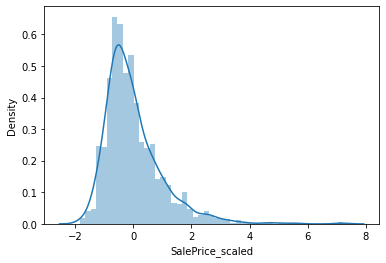

In [29]:
#Visualization of the scaled data
sns.distplot(df_train['SalePrice_scaled'])

We can observe from the above graph that, there no change in the distribution plat after the scaler.

In [30]:
df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_scaled
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,0.347042
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,0.007170
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,0.535860
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,-0.515225
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,0.869437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,8,2007,WD,Normal,175000,-0.074651
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2010,WD,Normal,210000,0.365924
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2500,5,2010,WD,Normal,266500,1.077137
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,4,2010,WD,Normal,142125,-0.488476


## 6.Bivariate Analysis - 

1. SalePrice vs OverallQual (Numerical-Categorical)
2. SalePrice vs GrLivArea (Numerical-Numerical)
3. SalePrice vs GarageCars (Numerical-Categorical)
4. SalePrice vs TotalBsmtSF (Numerical-Numerical)
5. SalePrice vs FullBath (Numerical-Categorical)
6. SalePrice vs YearBuilt (Numerical-Categorical)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

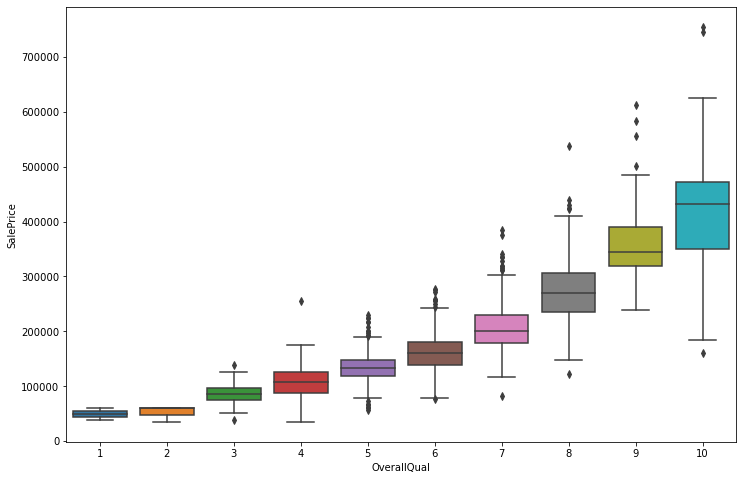

In [31]:
plt.figure(figsize=[12,8])
sns.boxplot(x=df_train['OverallQual'],y=df_train['SalePrice'])

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

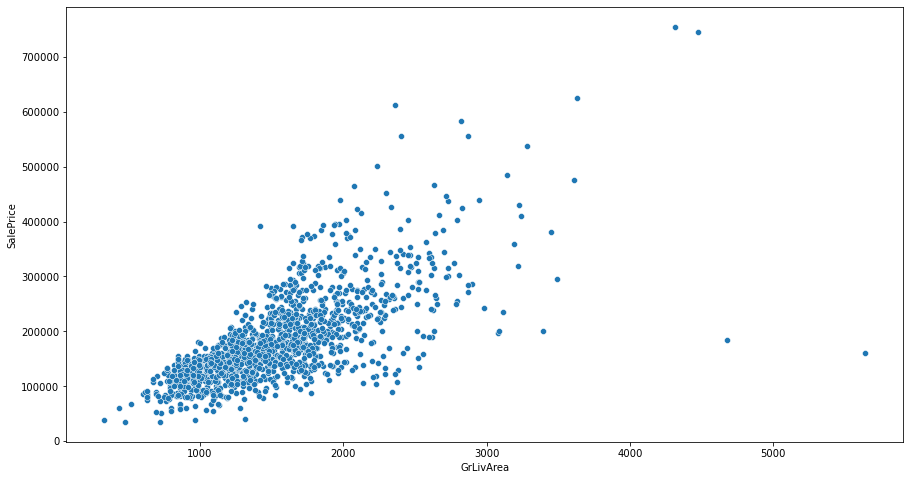

In [32]:
plt.figure(figsize=[15,8])
sns.scatterplot(x=df_train['GrLivArea'],y=df_train['SalePrice'])

What has been revealed:

* The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
* The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [33]:
#Fetch the outliers rows
outliers=df_train.sort_values(by='GrLivArea',ascending=False)[0:2]
outliers['GrLivArea']

1298    5642
523     4676
Name: GrLivArea, dtype: int64

In [34]:
#Dropping the outliers row
df_train=df_train.drop(df_train[df_train['Id']==1299].index)
df_train=df_train.drop(df_train[df_train['Id']==524].index)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

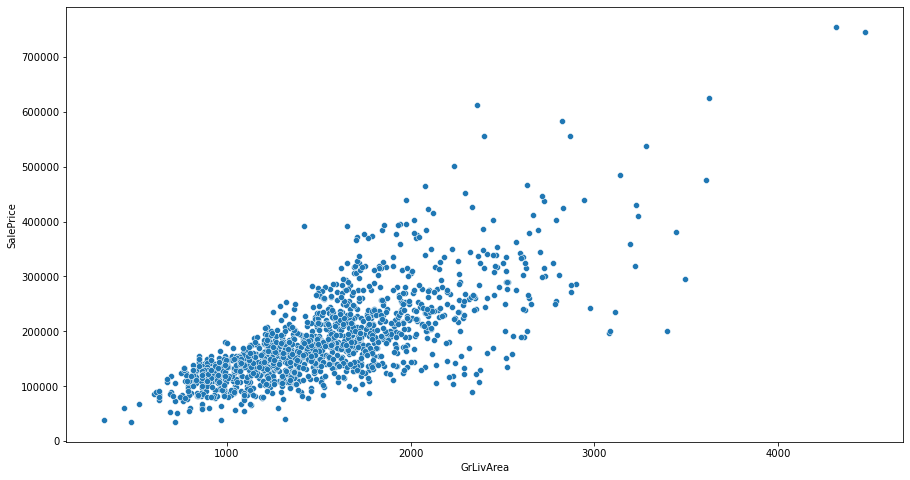

In [35]:
#Plotting the graph after the removal of outliers
plt.figure(figsize=[15,8])
sns.scatterplot(x=df_train['GrLivArea'],y=df_train['SalePrice'])

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

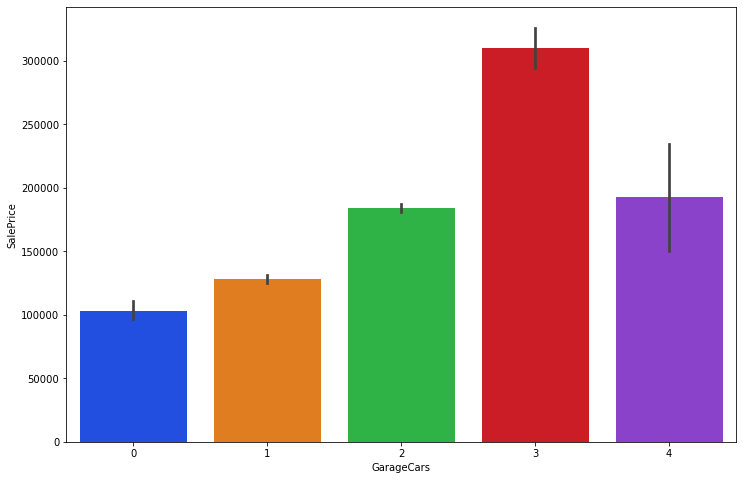

In [36]:
plt.figure(figsize=[12,8])
sns.barplot(x=df_train['GarageCars'],y=df_train['SalePrice'],palette='bright')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

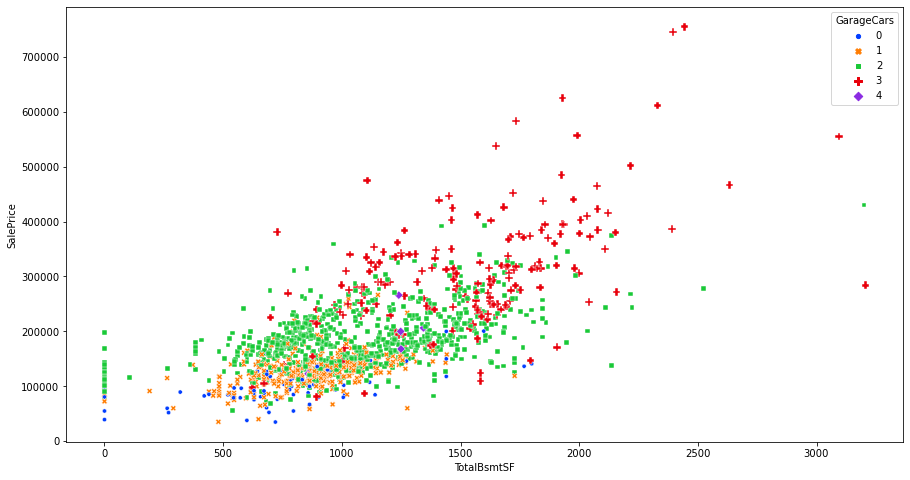

In [37]:
plt.figure(figsize=[15,8])
sns.scatterplot(x=df_train['TotalBsmtSF'],y=df_train['SalePrice'],hue=df_train['GarageCars'],style=df_train['GarageCars'],palette='bright',size=df_train['GarageCars'])

In [38]:
df_train['GarageCars'].value_counts()

2    822
1    369
3    180
0     81
4      5
Name: GarageCars, dtype: int64

* The TotalBsmtSF has some linear relationship with the GarageCars.
* There are some houses which have zero TotalBsmtSF but the people have car count to max 2.
* Most of the houses having the GarageCars=2 and lies between the TotalBsmtSF of = 1000 to 2500

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

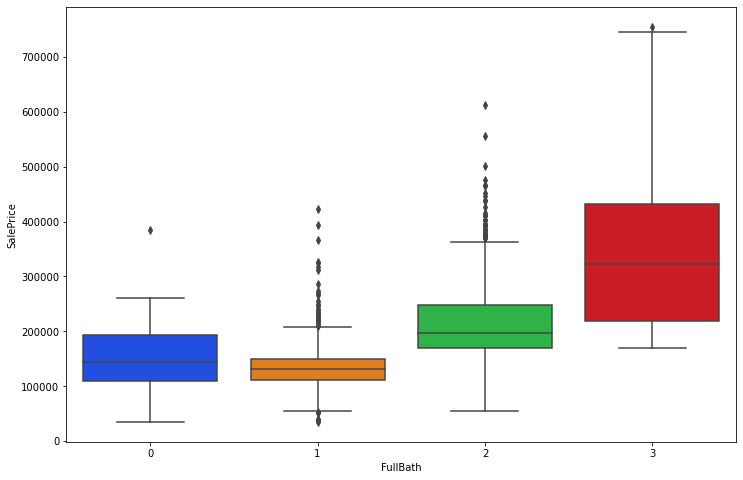

In [39]:
plt.figure(figsize=[12,8])
sns.boxplot(x=df_train['FullBath'],y=df_train['SalePrice'],palette='bright')

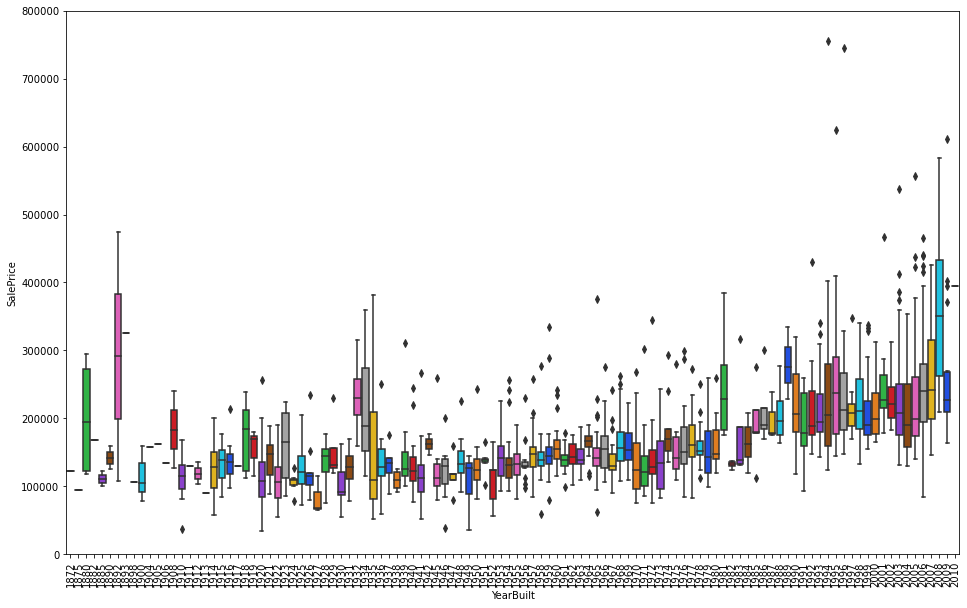

In [40]:
#The boxplot shows the SalePrice increase with respective to the yearBuilt 
plt.figure(figsize=[16,10])
fig=sns.boxplot(x=df_train['YearBuilt'],y=df_train['SalePrice'],palette='bright')
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

## 7. Understanding the Statistical Assumptions-
Lets understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.

In [41]:
#importing necessary libraries
from scipy import stats
from scipy.stats import norm

C:\Users\Snehal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


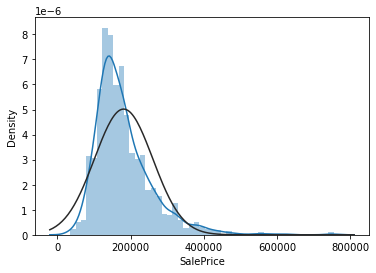

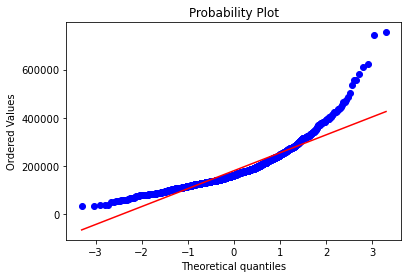

In [42]:
#distplot and normal probability plot of SalePrice
sns.distplot(df_train['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['SalePrice'],plot=plt)

The SalePrice is not normally distributed, it shows the positive skewness and does not diagonal line.
we can solve this issue using log transformation.


#### Normal Probability plot: 
The normal probability plot is a way of knowing whether the dataset is normally distributed or not. In this plot, data is plotted against the theoretical normal distribution plot in a way such that if a given dataset is normally distributed it should form an approximate straight line. 

In [43]:
#Log transformation of the target column
df_train['SalePrice']=np.log(df_train['SalePrice'])

C:\Users\Snehal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


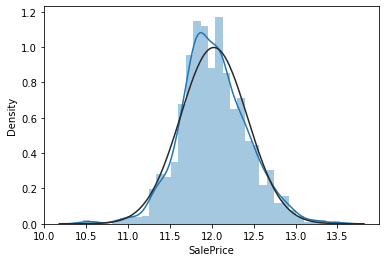

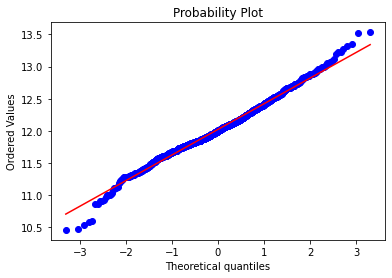

In [44]:
#Plotting the graph after log transformation
sns.distplot(df_train['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['SalePrice'],plot=plt)

**Log transformation** makes our skewed original data more normal. It improves linearity between our dependent and independent variables. It boosts validity of our statistical analyses.

C:\Users\Snehal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


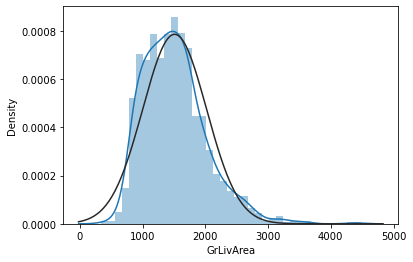

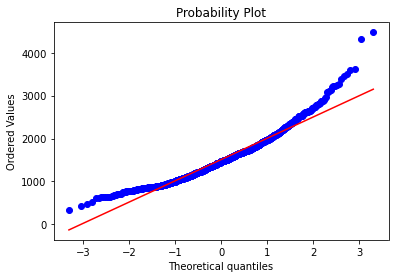

In [45]:
#distplot and normal probability plot of GrLivArea
sns.distplot(df_train['GrLivArea'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['GrLivArea'],plot=plt)

In [46]:
#log transformation of GrLivArea
df_train['GrLivArea']=np.log(df_train['GrLivArea'])

C:\Users\Snehal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


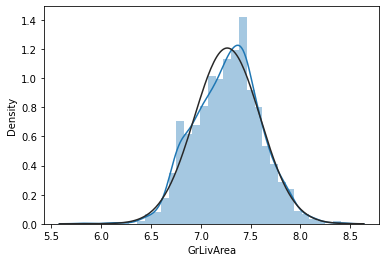

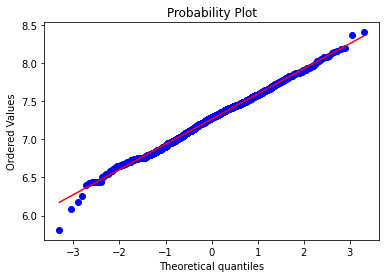

In [47]:
#distplot and normal probability plot of GrLivArea after log transformation
sns.distplot(df_train['GrLivArea'],fit=norm);
fig=plt.figure()
res=stats.probplot(df_train['GrLivArea'],plot=plt)

C:\Users\Snehal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


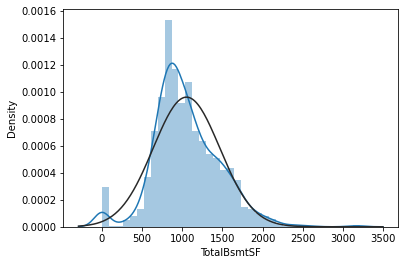

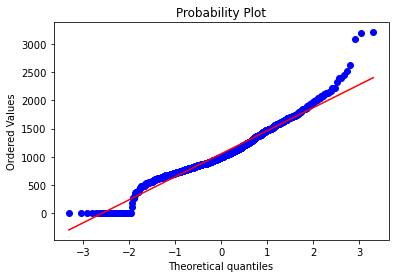

In [48]:
#distplot and normal probability plot of TotalBsmtSF
sns.distplot(df_train['TotalBsmtSF'],fit=norm);
fig=plt.figure()
res=stats.probplot(df_train['TotalBsmtSF'],plot=plt)

* A significant number of observations with value zero (houses without basement).
* A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

In [49]:
df_train['Hasbasement'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['Hasbasement']= 0
df_train.loc[df_train['TotalBsmtSF']>0,'Hasbasement']=1

In [50]:
#Apply the log transformation on the data having >0
df_train.loc[df_train['Hasbasement']==1,'TotalBsmtSF']=np.log(df_train['TotalBsmtSF'])


C:\Users\Snehal\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\Snehal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


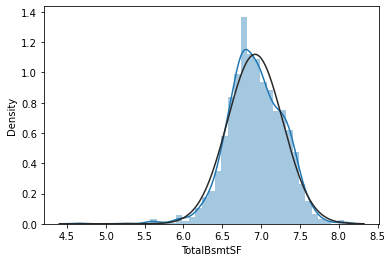

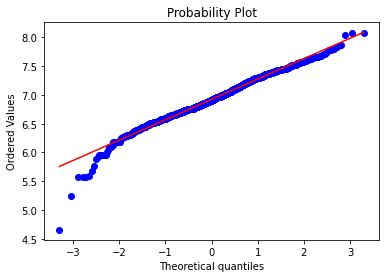

In [51]:
#distplot and normal probability plot of TotalBsmtSF after transformation
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

## Checking for Homoscedasticity -
The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

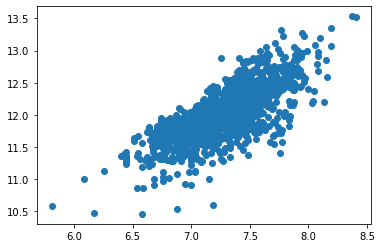

In [52]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

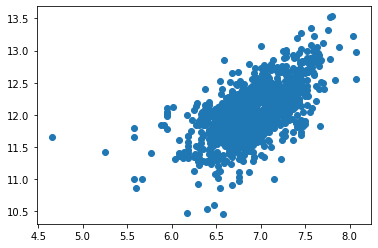

In [53]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [55]:
#Drop the extra unnecassary features
df_train=df_train.drop(['SalePrice_scaled','Hasbasement'],axis=1)

KeyError: "['SalePrice_scaled', 'Hasbasement'] not found in axis"

In [56]:
#converting categorical features into numerical features
df_train=pd.get_dummies(df_train.drop(df_train.select_dtypes(np.number),axis=1),drop_first=True)

In [58]:
#defining x & y
x=df_train.drop('SalePrice',axis=1)
y=df_train['SalePrice']

KeyError: "['SalePrice'] not found in axis"

In [ ]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()

In [ ]:
#model fit
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [ ]:
lreg.fit(x_train,y_train)

In [ ]:
#prediction
y_pred=lreg.predict(x_test)

In [ ]:
#model evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
result=r2_score(y_test,y_pred)
result

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

In [61]:
df_train.head(5)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
